In [51]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Lambda, concatenate
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, RNN

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Nadam
from tensorflow.keras import backend as K

In [52]:
mnist = tf.keras.datasets.mnist

In [53]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [54]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [133]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation ="relu"))
model.add(tf.keras.layers.Dense(10,activation ="softmax"))
model.compile(optimizer ="adam", loss= "sparse_categorical_crossentropy",metrics=['accuracy'])
model.fit(x_train,y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3140 - accuracy: 0.9121
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1421 - accuracy: 0.9586
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0992 - accuracy: 0.9709
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0756 - accuracy: 0.9781
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0583 - accuracy: 0.9827


In [134]:
model.save("handwritten.model")

INFO:tensorflow:Assets written to: handwritten.model/assets


INFO:tensorflow:Assets written to: handwritten.model/assets


In [135]:
model = tf.keras.models.load_model("handwritten.model")

In [136]:
loss, accuracy = model.evaluate(x_test,y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 0s 963us/step - loss: 0.0903 - accuracy: 0.9723
0.09033134579658508
0.9722999930381775


1/1 [==============================] - 0s 55ms/step
this digit is probably a 9


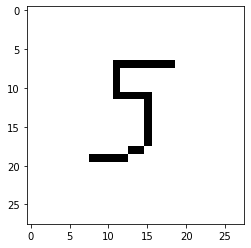

1/1 [==============================] - 0s 20ms/step
this digit is probably a 8


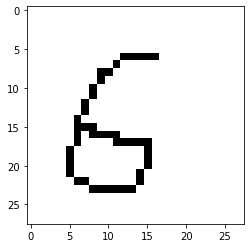

1/1 [==============================] - 0s 20ms/step
this digit is probably a 8


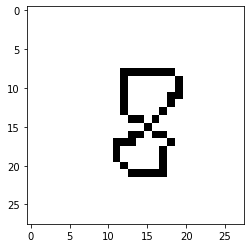

1/1 [==============================] - 0s 20ms/step
this digit is probably a 9


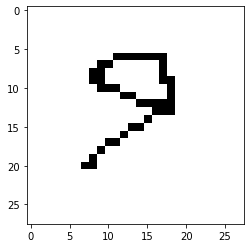

1/1 [==============================] - 0s 20ms/step
this digit is probably a 5


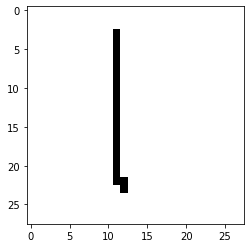

1/1 [==============================] - 0s 19ms/step
this digit is probably a 2


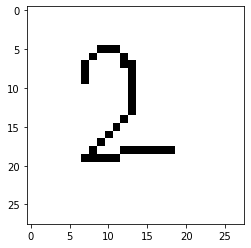

1/1 [==============================] - 0s 26ms/step
this digit is probably a 4


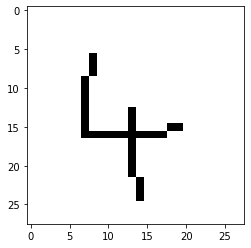

1/1 [==============================] - 0s 15ms/step
this digit is probably a 9


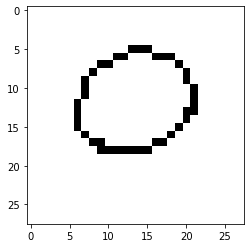

1/1 [==============================] - 0s 18ms/step
this digit is probably a 9


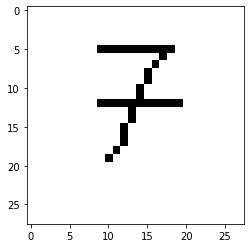

1/1 [==============================] - 0s 18ms/step
this digit is probably a 5


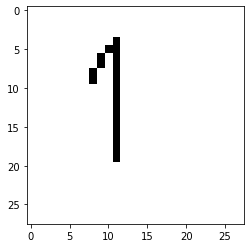

1/1 [==============================] - 0s 16ms/step
this digit is probably a 6


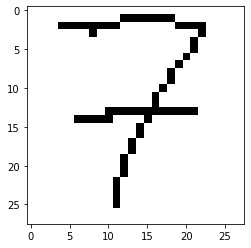

1/1 [==============================] - 0s 19ms/step
this digit is probably a 3


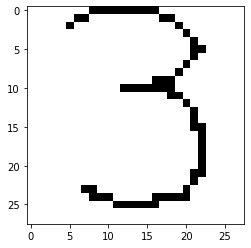

1/1 [==============================] - 0s 19ms/step
this digit is probably a 4


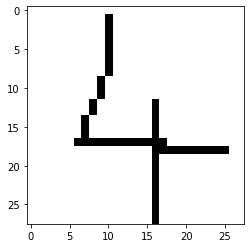

1/1 [==============================] - 0s 18ms/step
this digit is probably a 3


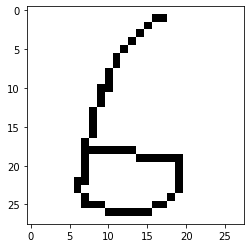

In [145]:
image_number = 1
while os.path.isfile(f'digits/digit{image_number}.png'):
                     try:
                         img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
                         img = np.invert(np.array([img]))
                         prediction = model.predict(img)
                         print(f"this digit is probably a {np.argmax(prediction)}")
                         plt.imshow(img[0],cmap = plt.cm.binary)
                         plt.show()
                     except:
                         print("error")
                     finally:
                         image_number += 1

In [144]:
input_shape = (28,28,1)

# Define the CNN ex1
ex1 = Sequential()

# First conv layer
ex1.add(Conv2D(5, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
#ex1.add(MaxPooling2D(pool_size=(2, 2)))

# Second conv layer
ex1.add(Conv2D(3, kernel_size=(3, 3), activation='relu'))

#ex1.add(Conv2D(3, kernel_size=(2, 2), activation='relu'))
#ex1.add(MaxPooling2D(pool_size=(2, 2)))
#3rd layer

# Fully connected MLP layers
ex1.add(Flatten())
#ex1.add(Dense(50, activation='softmax'))
#ex1.add(Dropout(0.5))
ex1.add(Dense(10, activation='softmax'))

# Output layer
#ex1.add(Dense(1, activation='sigmoid'))

# We use cross entropy error and the adam optimizer
adam = Adam()
ex1.compile(loss="sparse_categorical_crossentropy", optimizer=adam, metrics=['accuracy'])
ex1.summary()

# Now train the ex1
estimator_ex1 = ex1.fit(x_train, y_train, 
                      epochs=6)

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_82 (Conv2D)          (None, 26, 26, 5)         50        
                                                                 
 conv2d_83 (Conv2D)          (None, 24, 24, 3)         138       
                                                                 
 flatten_44 (Flatten)        (None, 1728)              0         
                                                                 
 dense_76 (Dense)            (None, 10)                17290     
                                                                 
Total params: 17,478
Trainable params: 17,478
Non-trainable params: 0
_________________________________________________________________
Epoch 1/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3027 - accuracy: 0.9127
Epoch 2/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.15

In [142]:
ex1.save("handwritten.model2")
model1 = tf.keras.models.load_model("handwritten.model2")
loss, accuracy = model1.evaluate(x_test,y_test)
print(loss)
print(accuracy)

INFO:tensorflow:Assets written to: handwritten.model2/assets


INFO:tensorflow:Assets written to: handwritten.model2/assets


313/313 [==============================] - 1s 1ms/step - loss: 0.1423 - accuracy: 0.9595
0.14231470227241516
0.9595000147819519


1/1 [==============================] - 0s 32ms/step
this digit is probably a 9


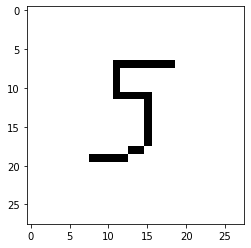

1/1 [==============================] - 0s 20ms/step
this digit is probably a 9


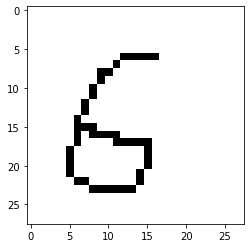

1/1 [==============================] - 0s 19ms/step
this digit is probably a 8


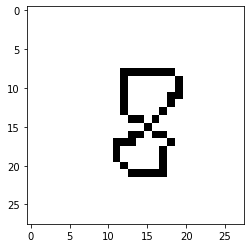

1/1 [==============================] - 0s 23ms/step
this digit is probably a 9


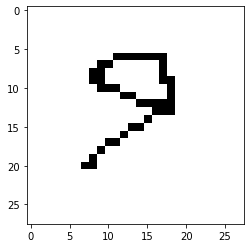

1/1 [==============================] - 0s 24ms/step
this digit is probably a 0


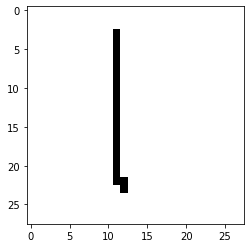

1/1 [==============================] - 0s 27ms/step
this digit is probably a 9


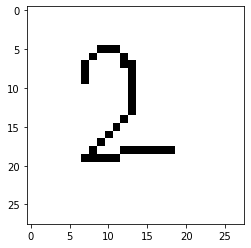

1/1 [==============================] - 0s 21ms/step
this digit is probably a 4


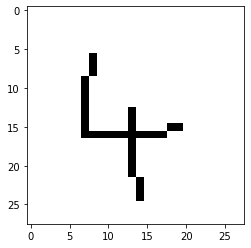

1/1 [==============================] - 0s 16ms/step
this digit is probably a 9


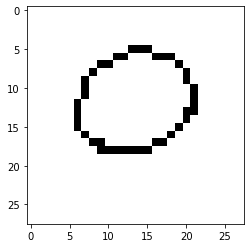

1/1 [==============================] - 0s 24ms/step
this digit is probably a 9


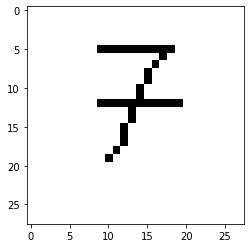

1/1 [==============================] - 0s 18ms/step
this digit is probably a 9


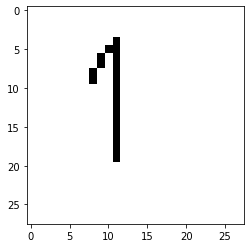

1/1 [==============================] - 0s 15ms/step
this digit is probably a 6


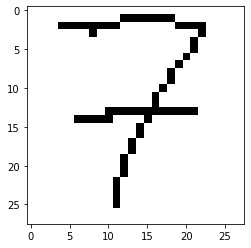

1/1 [==============================] - 0s 20ms/step
this digit is probably a 5


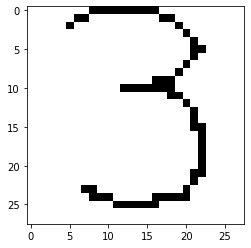

1/1 [==============================] - 0s 16ms/step
this digit is probably a 2


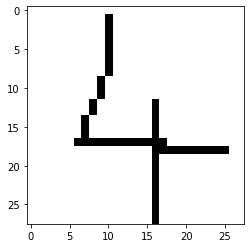

1/1 [==============================] - 0s 15ms/step
this digit is probably a 3


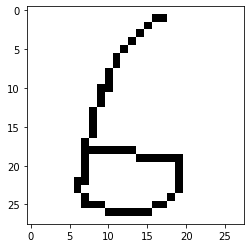

In [146]:
image_number = 1
while os.path.isfile(f'digits/digit{image_number}.png'):
                     try:
                         img = cv2.imread(f"digits/digit{image_number}.png")[:,:,0]
                         img = np.invert(np.array([img]))
                         prediction = model1.predict(img)
                         print(f"this digit is probably a {np.argmax(prediction)}")
                         plt.imshow(img[0],cmap = plt.cm.binary)
                         plt.show()
                     except:
                         print("error")
                     finally:
                         image_number += 1